<a href="https://colab.research.google.com/github/nehadanu002/Main-Flow-Services-and-Technologies-Pvt.-Ltd./blob/main/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Heart Disease Analysis project involves analysing a dataset related to
heart disease to identify key factors that contribute to heart disease
occurrence. The goal is to use data analytics techniques to predict the
likelihood of heart disease based on various health indicators such as age,
cholesterol levels, blood pressure, and other relevant features. The analysis
aims to provide insights that can help in early diagnosis and prevention.

---



In [3]:
#Importing all the libraries that we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#importing out dataset
df = pd.read_csv('heart.csv')

In [6]:
#checking first five rows by calling df.head()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [10]:
#take a look at the column names.
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [12]:
#checking for null values
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [13]:
#concise summary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


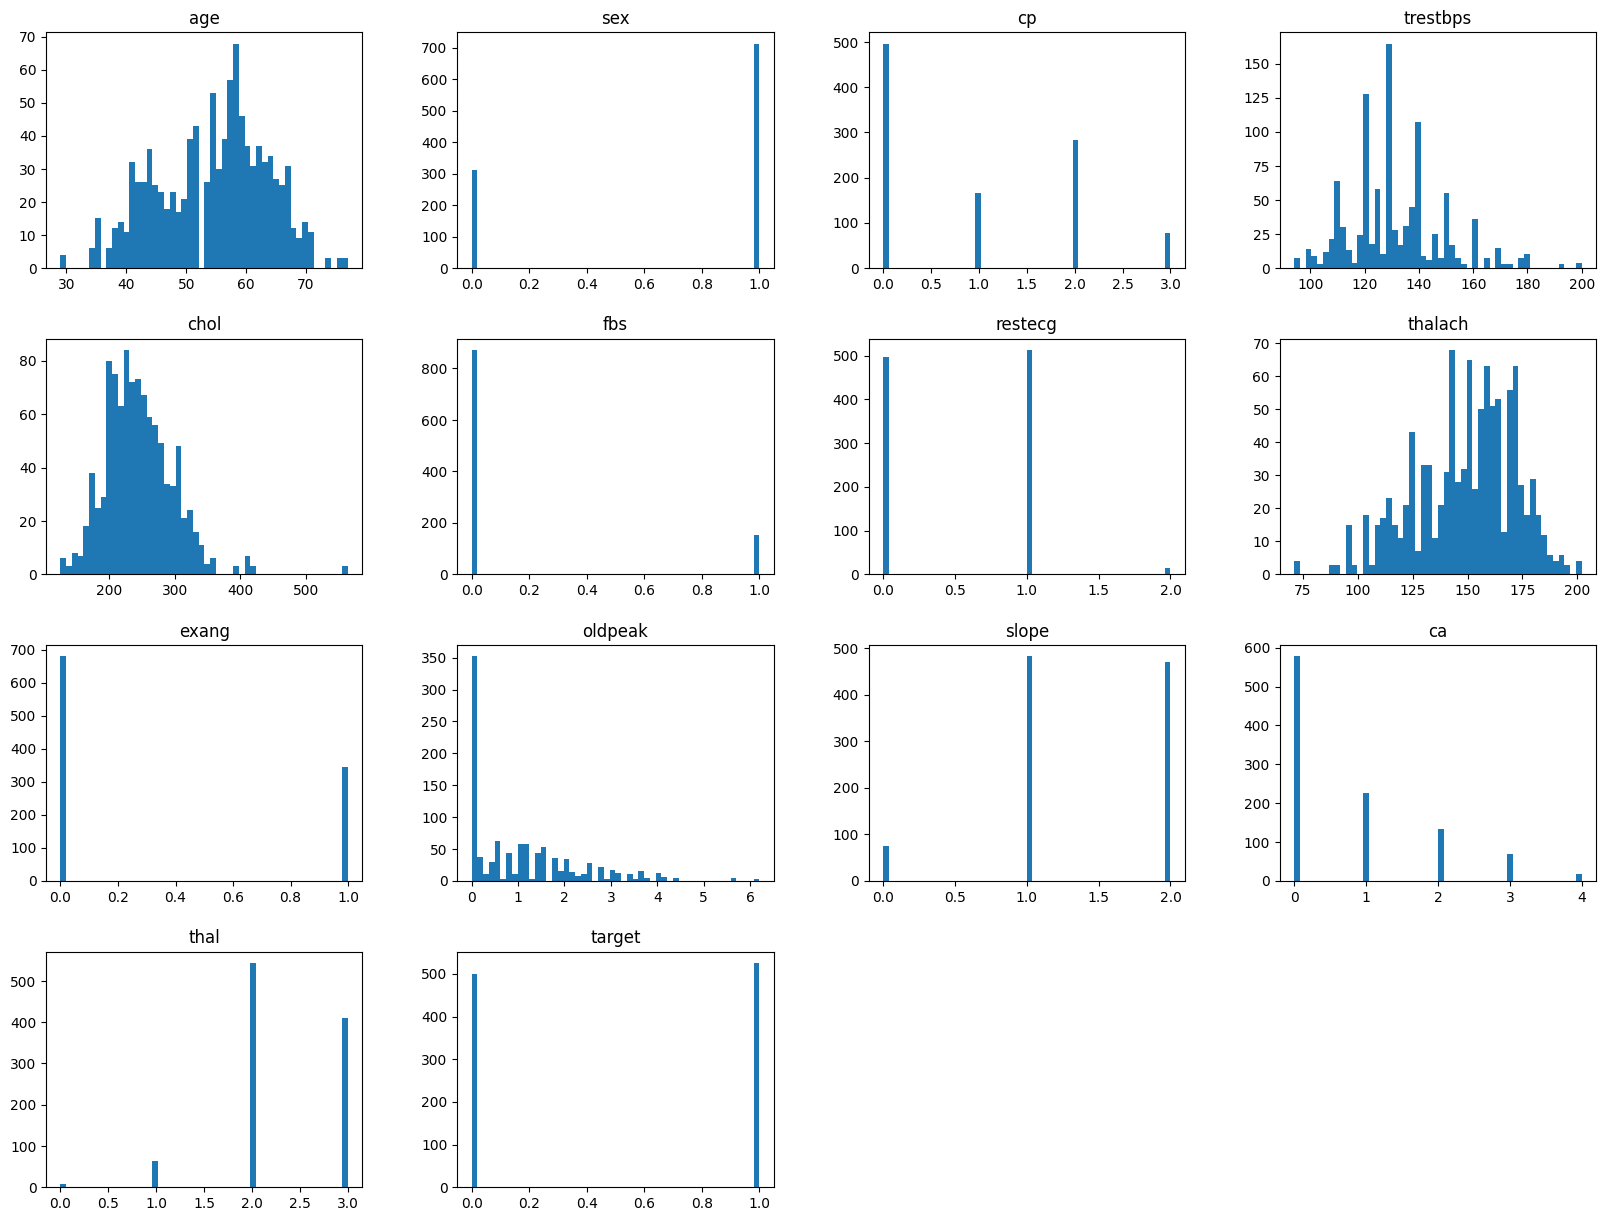

In [14]:
#plotting histogram of oil numeric values
df.hist(bins = 50, grid = False, figsize=(20,15));

In [15]:
#Generating descriptive statistics.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
questions = ["1. How many people have heart disease and how many people doesn't have heart disease? ",
             "2. People of which sex has most heart disease? ",
             "3. People of which sex has which type of chest pain most?",
             "4. People with which chest pain are most pron to have heart disease?",
             "5. What age group is most affected by heart disease?",
             "6. How do lifestyle factors such as diet and exercise influence heart disease prevalence?",
             "7. What are the most common risk factors associated with heart disease in different demographics?"]
questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease? ',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. What age group is most affected by heart disease?',
 '6. How do lifestyle factors such as diet and exercise influence heart disease prevalence?',
 '7. What are the most common risk factors associated with heart disease in different demographics?']

In [19]:
#Let's find the answer of the first question.

#1. How many people have heart disease and how many people doesn't have heart disease?

#getting the values
df.target.value_counts()

,count
target,
1,526
0,499


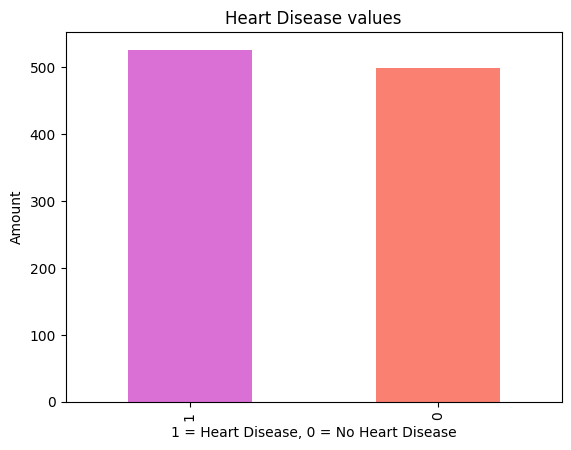

In [20]:
#plotting bar chart
df.target.value_counts().plot(kind = 'bar', color = ["orchid", "salmon"])
plt.title("Heart Disease values")
plt.xlabel("1 = Heart Disease, 0 = No Heart Disease")
plt.ylabel("Amount");
plt.show()

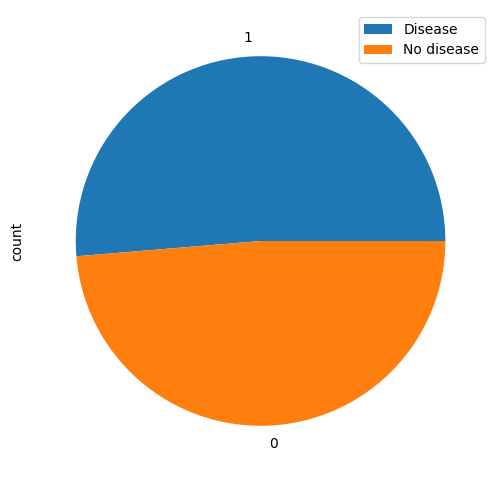

In [21]:
#plotting a pie chart
df.target.value_counts().plot(kind = 'pie', figsize =(8,6))
plt.legend(["Disease", "No disease"]);

In [23]:
#'0' represent 'Female'
#'1' represent 'Male'
# SEX column part
#'0' represent 'No disease'
#'1' represent 'Disease'
#Target column part
#Now let's check how many 'Male' and 'Female' are in the dataset
df.sex.value_counts()

,count
sex,
1,713
0,312


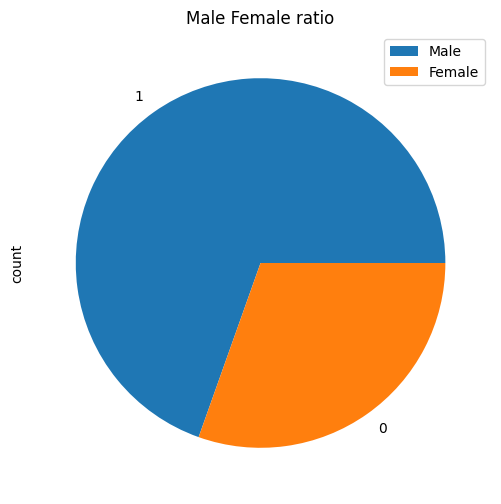

In [24]:
#plotting a pie chart
df.sex.value_counts().plot(kind = 'pie', figsize = (8,6))
plt.title('Male Female ratio')
plt.legend(['Male', 'Female']);

In [25]:
#Let's find the answer of our 2nd question.
#2. People of which sex has most heart disease?

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


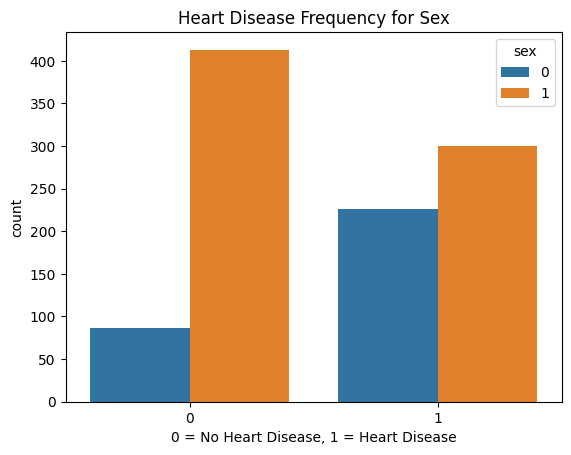

In [26]:
sns.countplot(x = 'target', data = df, hue = 'sex')
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease");

In [27]:
#Number of male is more than double in our dataset than female.

#More than '45% male' has heart disease and '75% female' has heart disease.


In [28]:
#Let's move to question 3

#3. People of which sex has which type of chest pain most?

#counting values for different chest pain
df.cp.value_counts()

,count
cp,
0,497
2,284
1,167
3,77


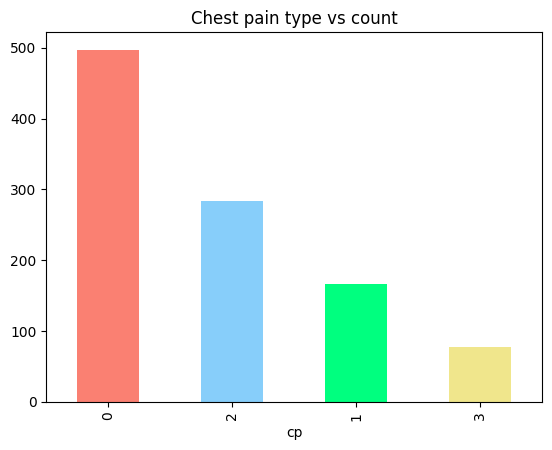

In [30]:
#plotting a bar chart
df.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
plt.title("Chest pain type vs count");

In [31]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


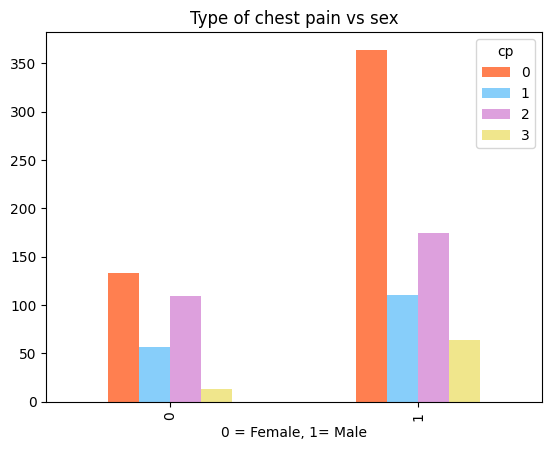

In [33]:
pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain vs sex')
plt.xlabel('0 = Female, 1= Male');

In [34]:
#Most of 'male' has 'type 0' chest pain and least of 'Male' has 'type 4' pain.

#in case of 'Female 'type 0' and 'type 2' percentage is almost same.

In [36]:
# Now question 4

#4. People with which chest pain are most pront to have heart disease?

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


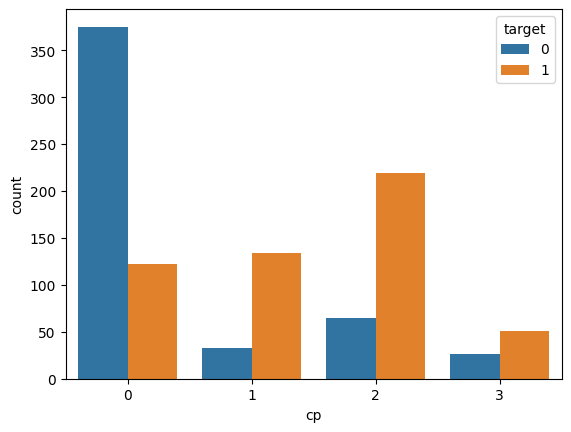

In [37]:
sns.countplot(x = 'cp', data = df, hue = 'target');

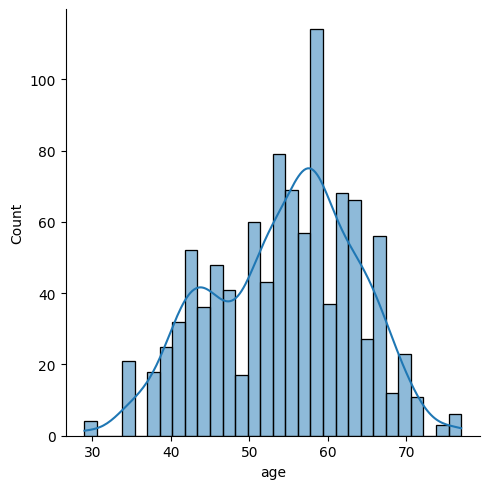

In [38]:
#Most of people who has 'type 0' chest pain has less chance of heart disease.

#And we see the opposite for the other types.

#Now let's take look at our age column.

#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = df, bins = 30, kde = True);

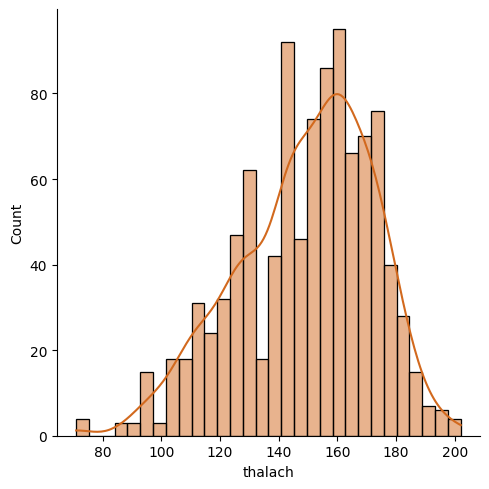

In [39]:
#'58-59' year old people are most in the dataset.

#Let's plot another distribution plot for 'Maximum heart rate'
sns.displot(x = 'thalach', data = df, bins = 30, kde = True, color = 'chocolate');

In [40]:
#From this plot we get a clear overview about Maximum heart rate represented by 'thalach'